Found 720 images belonging to 9 classes.
Found 180 images belonging to 9 classes.
Epoch 1/50
22/22 [==============================] - 532s 24s/step - loss: 2.9541 - accuracy: 0.0959 - val_loss: 2.2017 - val_accuracy: 0.1222
Epoch 2/50
22/22 [==============================] - 524s 24s/step - loss: 2.1786 - accuracy: 0.1090 - val_loss: 2.1570 - val_accuracy: 0.1111
Epoch 3/50
22/22 [==============================] - 519s 24s/step - loss: 2.1642 - accuracy: 0.1250 - val_loss: 2.1383 - val_accuracy: 0.1222
Epoch 4/50
22/22 [==============================] - 515s 23s/step - loss: 2.1454 - accuracy: 0.1279 - val_loss: 2.0944 - val_accuracy: 0.2056
Epoch 5/50
22/22 [==============================] - 507s 23s/step - loss: 2.1109 - accuracy: 0.1613 - val_loss: 2.0940 - val_accuracy: 0.2000
Epoch 6/50
22/22 [==============================] - 362s 16s/step - loss: 2.0884 - accuracy: 0.1672 - val_loss: 2.0235 - val_accuracy: 0.2167
Epoch 7/50
22/22 [==============================] - 319s 15s/step 

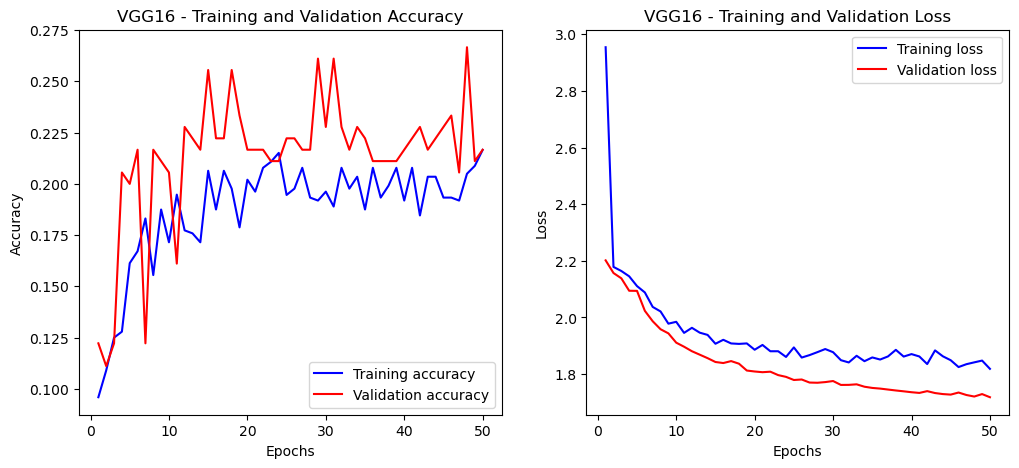

1/1 [==============================] - 12s 12s/step


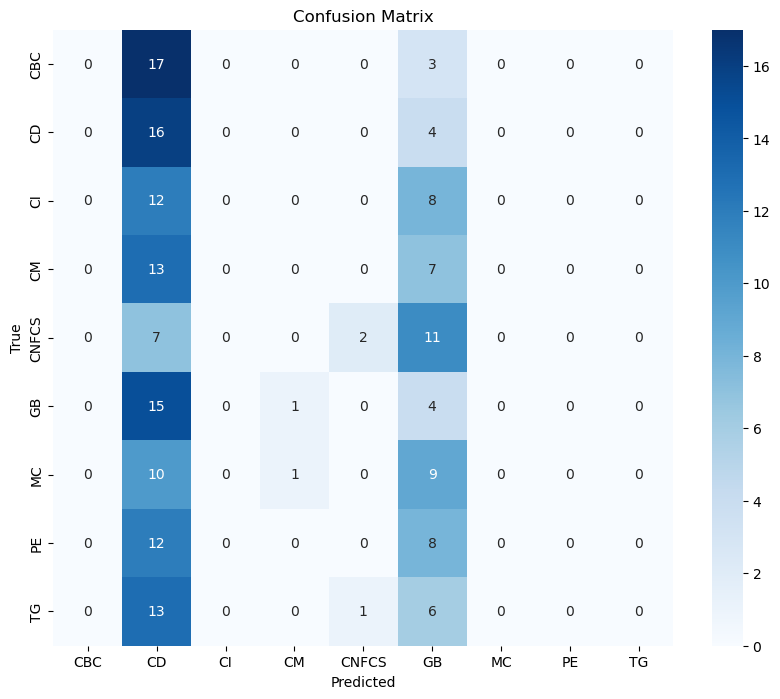

6/6 [==============================] - 66s 10s/step


C:\Users\mttvi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mttvi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mttvi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report - VGG16:
               precision    recall  f1-score   support

         CBC       0.00      0.00      0.00        20
          CD       0.14      0.80      0.24        20
          CI       0.00      0.00      0.00        20
          CM       0.00      0.00      0.00        20
       CNFCS       0.67      0.10      0.17        20
          GB       0.07      0.20      0.10        20
          MC       0.00      0.00      0.00        20
          PE       0.00      0.00      0.00        20
          TG       0.00      0.00      0.00        20

    accuracy                           0.12       180
   macro avg       0.10      0.12      0.06       180
weighted avg       0.10      0.12      0.06       180

Epoch 1/50
22/22 [==============================] - 393s 18s/step - loss: 3.9644 - accuracy: 0.1323 - val_loss: 2.1859 - val_accuracy: 0.2056
Epoch 2/50
22/22 [==============================] - 387s 18s/step - loss: 2.2019 - accuracy: 0.1250 - val_loss: 2.1972 - 

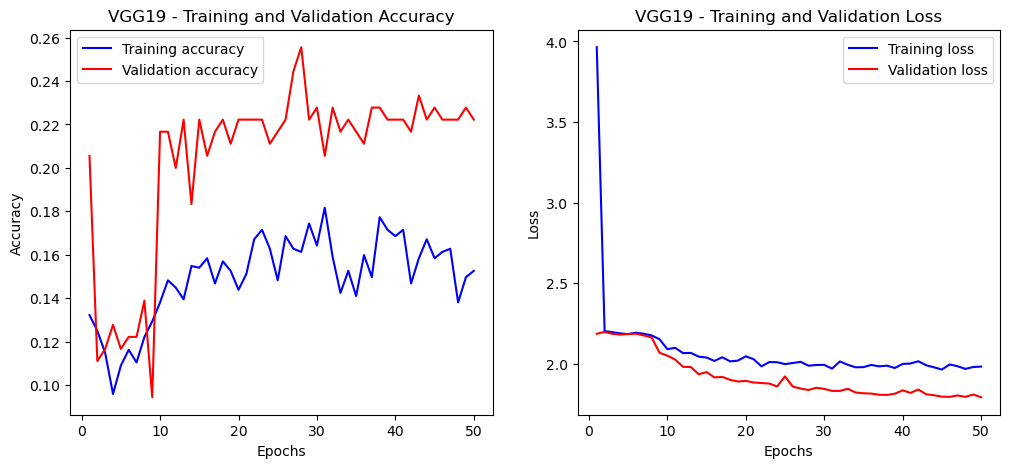

1/1 [==============================] - 13s 13s/step


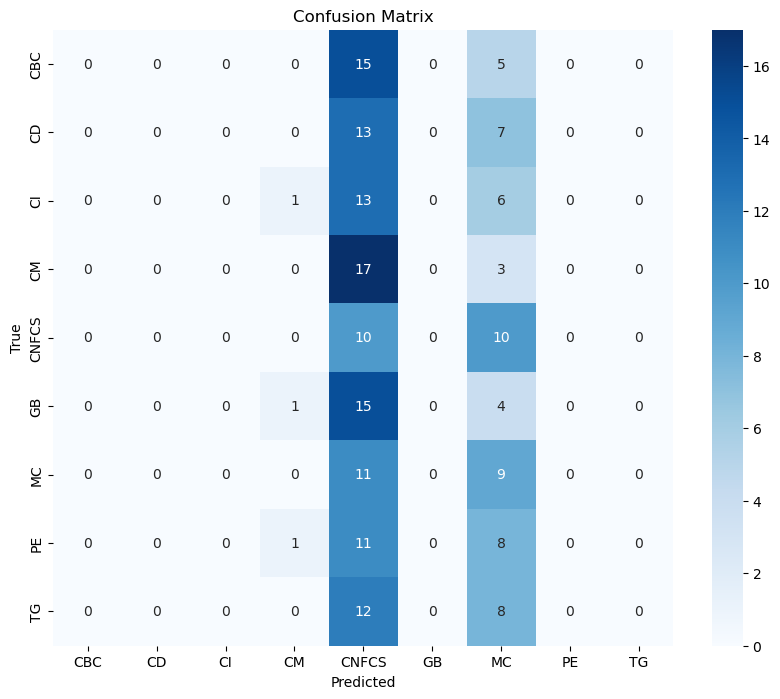

6/6 [==============================] - 79s 12s/step
Classification Report - VGG19:
               precision    recall  f1-score   support

         CBC       0.00      0.00      0.00        20
          CD       0.00      0.00      0.00        20
          CI       0.00      0.00      0.00        20
          CM       0.00      0.00      0.00        20
       CNFCS       0.09      0.50      0.15        20
          GB       0.00      0.00      0.00        20
          MC       0.15      0.45      0.23        20
          PE       0.00      0.00      0.00        20
          TG       0.00      0.00      0.00        20

    accuracy                           0.11       180
   macro avg       0.03      0.11      0.04       180
weighted avg       0.03      0.11      0.04       180



C:\Users\mttvi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mttvi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mttvi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [4]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, VGG19
from tensorflow.keras import models, layers, optimizers
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

data_dir = r"C:\Users\mttvi\OneDrive\Área de Trabalho\DB2\Feijaotex"

img_size = (256, 256)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

def plot_training(history, model_name):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title(f'{model_name} - Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(f'{model_name} - Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

def plot_confusion_matrix(model, generator):
    y_true = generator.classes
    num_batches = int(np.ceil(generator.samples / batch_size))
    y_pred = []

    for i in range(num_batches):
        batch_x, batch_y = generator.next()
        pred_batch = model.predict(batch_x)
        y_pred.extend(np.argmax(pred_batch, axis=-1))

    y_pred = np.array(y_pred)
    
    cm = confusion_matrix(y_true, y_pred, labels=list(train_generator.class_indices.values()))

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

names = ['CBC', 'CD', 'CI', 'CM', 'CNFCS', 'BG', 'MC', 'PE', 'TG']
nk = [9, 10, 9, 7, 8, 9, 8, 10, 10]

# VGG16
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

for layer in vgg16_model.layers:
    layer.trainable = False

model_vgg16 = models.Sequential()
model_vgg16.add(vgg16_model)
model_vgg16.add(layers.Flatten())
model_vgg16.add(layers.Dense(256, activation='relu'))
model_vgg16.add(layers.Dropout(0.5))
model_vgg16.add(layers.Dense(len(names), activation='softmax'))

model_vgg16.compile(
    optimizer=optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_vgg16 = model_vgg16.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=50,
    validation_data=val_generator,
    validation_steps=math.ceil(val_generator.samples / batch_size)
)

val_loss_vgg16, val_acc_vgg16 = model_vgg16.evaluate(val_generator, steps=math.ceil(val_generator.samples / batch_size))
print(f'VGG16 Validation Accuracy: {val_acc_vgg16 * 100:.2f}%')

plot_training(history_vgg16, 'VGG16')

plot_confusion_matrix(model_vgg16, val_generator)

predictions_vgg16 = model_vgg16.predict(val_generator)
y_true_vgg16 = val_generator.classes
y_pred_vgg16 = np.argmax(predictions_vgg16, axis=1)
class_labels_vgg16 = list(train_generator.class_indices.keys())

print("Classification Report - VGG16:\n", classification_report(y_true_vgg16, y_pred_vgg16, target_names=class_labels_vgg16))

vgg19_model = VGG19(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

for layer in vgg19_model.layers:
    layer.trainable = False

model_vgg19 = models.Sequential()
model_vgg19.add(vgg19_model)
model_vgg19.add(layers.Flatten())
model_vgg19.add(layers.Dense(256, activation='relu'))
model_vgg19.add(layers.Dropout(0.5))
model_vgg19.add(layers.Dense(len(names), activation='softmax'))

model_vgg19.compile(
    optimizer=optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_vgg19 = model_vgg19.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=50,
    validation_data=val_generator,
    validation_steps=math.ceil(val_generator.samples / batch_size)
)

val_loss_vgg19, val_acc_vgg19 = model_vgg19.evaluate(val_generator, steps=math.ceil(val_generator.samples / batch_size))
print(f'VGG19 Validation Accuracy: {val_acc_vgg19 * 100:.2f}%')

# Plotar treinamento
plot_training(history_vgg19, 'VGG19')

# Plotar matriz de confusão
plot_confusion_matrix(model_vgg19, val_generator)

# Classification Report
predictions_vgg19 = model_vgg19.predict(val_generator)
y_true_vgg19 = val_generator.classes
y_pred_vgg19 = np.argmax(predictions_vgg19, axis=1)
class_labels_vgg19 = list(train_generator.class_indices.keys())

print("Classification Report - VGG19:\n", classification_report(y_true_vgg19, y_pred_vgg19, target_names=class_labels_vgg19))
